## Observations and Insights

## Dependencies and starter code

In [103]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

In [9]:
# Combining both data sets into a single data set. Using Inner join - only interested in records that match 
#on both files

combined_data_df = pd.merge(mouse_metadata, study_results,how='inner', on='Mouse ID')
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [86]:
#Rename column name Tumor Volume (mm3) to just Tumor
combined_data_df = combined_data_df.rename(columns = {'Tumor Volume (mm3)' : 'Tumor'})
#Group Data
Tumor_Data_df = combined_data_df[['Drug Regimen','Tumor']]
Summary_Stats_df = Tumor_Data.groupby('Drug Regimen')
#Generate Summary Stats
Summary_Stats_Mean_df = Summary_Stats_df.mean().rename(columns = {'Tumor' : 'Mean'})
Summary_Stats_Median_df = Summary_Stats_df.median().rename(columns = {'Tumor' : 'Median'})
Summary_Stats_Var_df = Summary_Stats_df.var().rename(columns = {'Tumor' : 'Variance'})
Summary_Stats_StVar_df = Summary_Stats_df.std().rename(columns = {'Tumor' : 'StVar'})
Summary_Stats_SEM_df = Summary_Stats_df.sem().rename(columns = {'Tumor' : 'SEM'})
#Merge all datasets
combined_stats_df = pd.merge(Summary_Stats_Mean_df, Summary_Stats_Median_df, how="inner", on="Drug Regimen")
combined_stats_df = pd.merge(combined_stats_df, Summary_Stats_Var_df, how="inner", on="Drug Regimen")
combined_stats_df = pd.merge(combined_stats_df, Summary_Stats_StVar_df, how="inner", on="Drug Regimen")
Summary_Statistics_Table_df = pd.merge(combined_stats_df, Summary_Stats_SEM_df, how="inner", on="Drug Regimen")
Summary_Statistics_Table_df


,Mean,Median,Variance,StVar,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

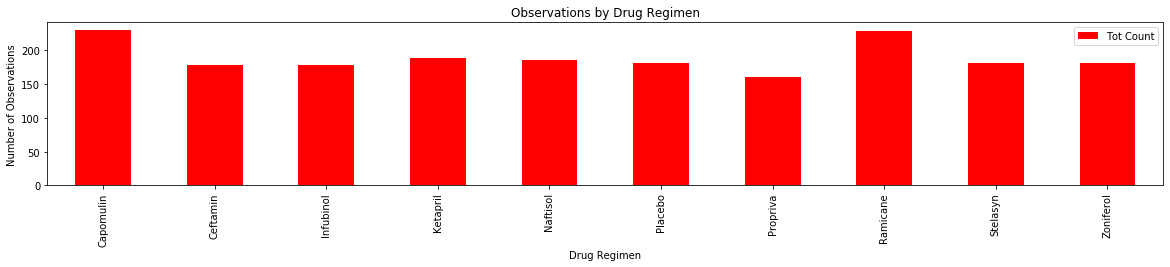

<Figure size 432x288 with 0 Axes>

In [127]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

cnt_by_regimen_df = combined_data_df.groupby('Drug Regimen').count()[['Mouse ID']]
cnt_by_regimen_df  = cnt_by_regimen_df .rename(columns = {'Mouse ID' : 'Tot Count'})


# Use DataFrame.plot() in order to create a bar chart of the data
cnt_by_regimen_df.plot(kind="bar", figsize=(20,3), color='red')

# Set a title for the chart
plt.title("Observations by Drug Regimen")
plt.ylabel("Number of Observations")

plt.show()
plt.tight_layout()

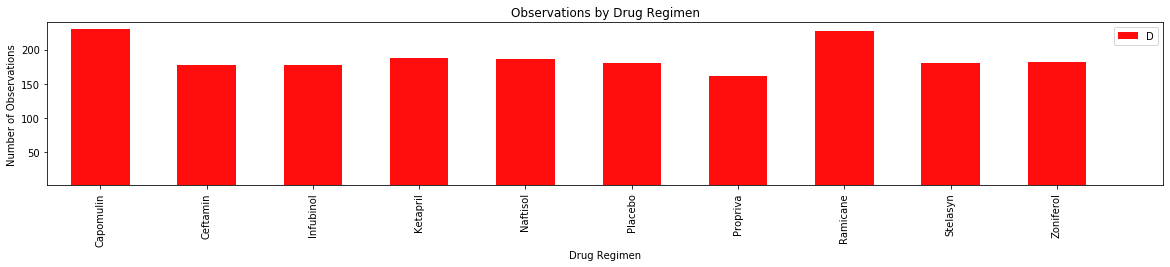

In [167]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Set x axis and tick locations

#Reset Index
#cnt_by_regimen_df = cnt_by_regimen_df.reset_index()

x_axis = np.arange(len(cnt_by_regimen_df))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

#np.arange(len(cnt_by_regimen_df))
#tick_locations = [value for value in x_axis]

plt.figure(figsize=(20,3))
plt.bar(x_axis, cnt_by_regimen_df["Tot Count"], width=0.55, color='r', alpha=0.95, align="center")
plt.xticks(tick_locations, cnt_by_regimen_df["Drug Regimen"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.5, len(x_axis))
plt.ylim(1, max(cnt_by_regimen_df["Tot Count"])+10)

# Set a Title and labels
plt.title("Observations by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observations")
plt.legend("Drug Regimen", loc=1)  #This is not working
plt.show()

## Pie plots

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen